In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#df = pd.read_csv("../datasets/downsampeled_dataset.csv") #30k posts
#df = pd.read_csv("../datasets/prepend_done.csv", nrows=5)
#print(list(df.columns))
#feats_to_read = list(set(df.columns)-set(["post_text", "post_id"]))
#df = pd.read_csv("../datasets/prepend_done.csv", usecols=feats_to_read)#680k posts
id_to_Y = pd.read_csv("../datasets/id_to_Y_600k.csv")
#id_to_topic = pd.read_csv("../datasets/id_to_topics.csv")

#df_comment = pd.read_csv("../datasets/comments_cleaned_16_07_2021.csv", usecols=["comment_score", "post_id"] )
#df_comment = df_comment.loc[df_comment['post_id'].isin(post_ids)] 
#print(df.columns.to_list())
#print("Number of posts", len(df))
#print("Number of comments", len(df_comment))
print(id_to_Y["Y"].std())
print(id_to_Y["Y"].mean())

0.41099379160293936
0.3306077778963877


## Average A-hole per topic

  post_id         Y  topic_nr
0  cjpuz4       NaN         1
1  cjpv01  0.500000        -1
2  cjpv0s  0.000000         8
3  cjpvp7  0.001773        -1
4  cjpwz0  0.527273         4


Text(0, 0.5, 'Mean a-hole ratio')

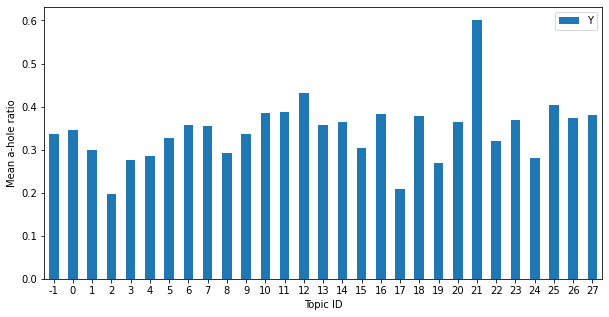

In [13]:
print(id_to_Y.head(5))
id_to_Y = id_to_Y.merge(id_to_topic, left_on="post_id", right_on="post_id",validate="1:1", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

plt.rcParams["figure.figsize"] = (10, 5)
means = id_to_Y.groupby('topic_nr').mean()

ax = means.plot.bar( y='Y', rot=0)
ax.set_xlabel("Topic ID")
ax.set_ylabel("Mean a-hole ratio")


# overall distribution of comments that include AITA tags  

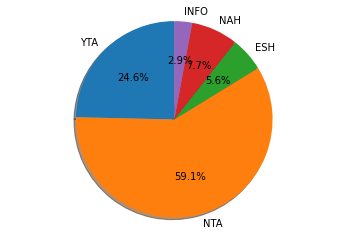

In [5]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'YTA', 'NTA', 'ESH', 'NAH', "INFO"
sizes = list(map(lambda x: df["reactions_"+x].sum(), labels))

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Comments with negative scores

In [4]:
df_comment_neg = df_comment.loc[df_comment['comment_score']<0] 
print("Negative comments in percentage", len(df_comment_neg)/len(df_comment))

df_comment_neg_esh = df_comment.loc[df_comment['comment_score']<0&df_comment['comment_score']<0] 
print("Negative comments in percentage", len(df_comment_neg)/len(df_comment))

Negative comments in percentage 0.060505801523628576


# Descriptive stats

In [5]:

import xlsxwriter
keys = ["info", "yta", "nah", "esh", "nta"]
weight = "weighted_"
values = ["reactions_"+weight+k.upper() for k in keys]
acros = dict(zip(keys, values))
vote_acroynms = list(filter(lambda x: any(
    [acr.upper() in x for acr in list(acros.keys())]), list(df.columns)))
#df = df.drop(columns=["writing_sty_focus_you_pl_subj_norm", "writing_sty_focus_you_pl_poss_norm", "writing_sty_focus_you_pl_obj_norm"])

df_descriptive = df.describe().drop(["count", "25%", "50%", "75%", "min", "max"])#.T.drop("Y")
print(df_descriptive)

df_descriptive.T.to_excel("df_descriptive.xlsx")
#writer = pd.ExcelWriter('df_descriptive.xlsx', engine = 'xlsxwriter')
#df_descriptive.to_excel(writer, index=False, sheet_name='Sheet1')
#workbook  = writer.book
#worksheet = writer.sheets['Sheet1']
#format1 = workbook.add_format({'num_format': '0.0000'})
##worksheet.set_column('C:C', None, format1)  # Adds formatting to column C
#worksheet.set_column('C:C', None, format1)
#writer.save()

      speaker_author_age  speaker_author_gender  post_num_comments  \
mean            4.342501               0.759527          56.802261   
std            10.801548               0.502549         248.486236   

      reactions_weighted_YTA  reactions_weighted_NTA  reactions_weighted_INFO  \
mean               31.012887               66.982352                 1.786615   
std               804.760756             1006.455995                65.933120   

      reactions_weighted_ESH  reactions_weighted_NAH  \
mean                5.123450                5.260410   
std               225.768741              191.556768   

      reactions_weighted_YTA_neg_vals  reactions_weighted_NTA_neg_vals  ...  \
mean                        -0.563994                        -0.437457  ...   
std                          8.557257                         6.008095  ...   

         post_ups  post_downs  post_ratio  reactions_is_angel  \
mean   239.109534   18.324292    0.793788            0.015197   
std   16

# Most imporatant feature interactions

In [2]:
import pandas as pd
interactions = pd.read_csv("../datasets/shap_interaction_values.csv")
column_names = interactions.columns.to_list()
print(interactions)



     speaker_author_age  speaker_author_gender  writing_sty_!_count  \
0              0.003464               0.001753             0.000000   
1              0.001753               0.001663             0.000000   
2              0.000000               0.000000             0.000272   
3              0.000012               0.000000             0.000000   
4              0.000000               0.000000             0.000000   
..                  ...                    ...                  ...   
184            0.000014               0.000000             0.000000   
185            0.000096               0.000046             0.000000   
186            0.000663               0.000523             0.000000   
187            0.000002               0.000000             0.000000   
188            0.000000               0.000000             0.000000   

     writing_sty_"_count  writing_sty_?_count  writing_sty_negative_norm  \
0               0.000012             0.000000                   0.00005

In [6]:
d = {'featureCombination': [], 'interaction': []}


for index, row in interactions.iterrows():
    for i in range(len(column_names)):
        row_name = column_names[index]
        column_name = column_names[i]
        if i != index and (row_name=="liwc_female" or column_name=="liwc_female"):
            d["featureCombination"].append(row_name+" X "+column_name)
            d["interaction"].append(row[column_names[i]]*2)

df_feature_interaction = pd.DataFrame(data=d)    
df_feature_interaction = df_feature_interaction.sort_values(by=["interaction"],ascending=False)
print(df_feature_interaction.head(30))

                                    featureCombination  interaction
173        liwc_female X writing_sty_focus_i_poss_norm     0.002079
40         writing_sty_focus_i_poss_norm X liwc_female     0.002079
186   liwc_female X writing_sty_self_anticipation_norm     0.001931
53    writing_sty_self_anticipation_norm X liwc_female     0.001931
250                          liwc_female X liwc_negate     0.001890
117                          liwc_negate X liwc_female     0.001890
370                            liwc_Dash X liwc_female     0.001874
315                            liwc_female X liwc_Dash     0.001874
240                              liwc_female X liwc_we     0.001838
107                              liwc_we X liwc_female     0.001838
97                            liwc_Clout X liwc_female     0.001724
230                           liwc_female X liwc_Clout     0.001724
235                             liwc_female X liwc_Dic     0.001407
102                             liwc_Dic X liwc_